# 1. Problem Statement and Goal

Objective: To build a predictive model that estimates the next day's Closing Price of a specific stock (e.g., Apple - AAPL) using historical data. Goal: Utilize features such as the opening price, daily highs, lows, and trading volume to train a Random Forest Regressor and evaluate its accuracy against actual market results.

In [1]:
!pip install yfinance

# 2. Dataset Loading and Preprocessing



In [ ]:

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Download Apple (AAPL) stock data for the last 2 years
ticker = 'AAPL'
data = yf.download(ticker, start="2022-01-01", end="2024-01-01")

# 2. Preprocessing: Create the "Target" column
# We want to predict tomorrow's Close price using today's data
data['Target_Close'] = data['Close'].shift(-1)

# Drop the last row because it won't have a "Tomorrow" price to predict
data.dropna(inplace=True)

# Select our Features (X) and Target (y)
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = data[features]
y = data['Target_Close']

print(f"Data successfully loaded for {ticker}. Total samples: {len(data)}")

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


# 1. Download Apple (AAPL) stock data for the last 2 years
ticker = 'AAPL'
data = yf.download(ticker, start="2022-01-01", end="2024-01-01")

# 2. Preprocessing: Create the "Target" column
# We want to predict tomorrow's Close price using today's data
data['Target_Close'] = data['Close'].shift(-1)


# Drop the last row because it won't have a "Tomorrow" price to predict
data.dropna(inplace=True)


# Select our Features (X) and Target (y)
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = data[features]
y = data['Target_Close']

print(f"\nData successfully loaded for {ticker}. Total samples: {len(data)}")


/tmp/ipython-input-511682304.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2022-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Data successfully loaded for AAPL. Total samples: 500


In [9]:
data.shape
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2022-01-03 to 2023-12-28
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     500 non-null    float64
 1   (High, AAPL)      500 non-null    float64
 2   (Low, AAPL)       500 non-null    float64
 3   (Open, AAPL)      500 non-null    float64
 4   (Volume, AAPL)    500 non-null    int64  
 5   (Target_Close, )  500 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 27.3 KB


Price,Close,High,Low,Open,Volume,Target_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2022-01-03,178.270325,179.122459,174.058687,174.176216,104487900,176.007797
2022-01-04,176.007797,179.181232,175.439712,178.877604,99310400,171.325974
2022-01-05,171.325974,176.468103,171.051728,175.919612,94537600,168.465973
2022-01-06,168.465973,171.698172,168.113369,169.151587,96904000,168.632523
2022-01-07,168.632523,170.562047,167.515946,169.337730,86709100,168.652100


# 3. Data Visualization and Exploration

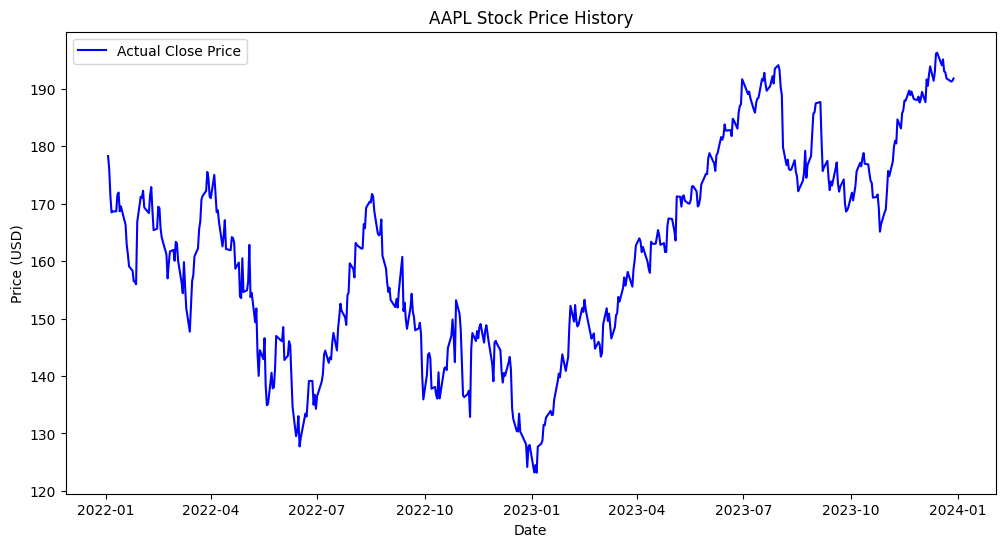

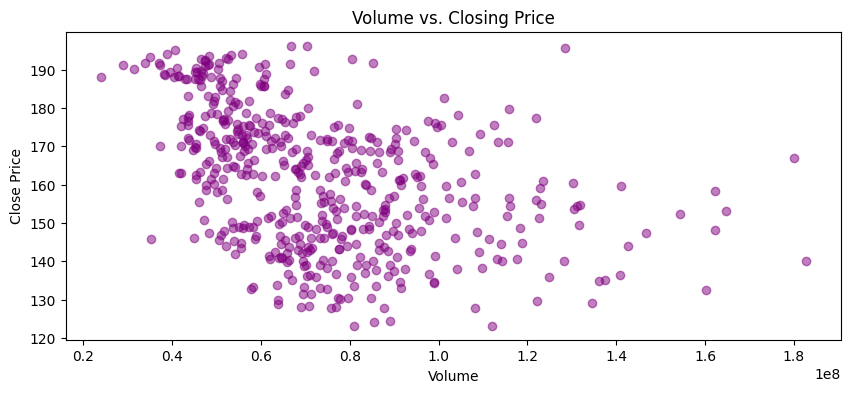

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual Close Price', color='blue')
plt.title(f'{ticker} Stock Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Visualizing Volume vs Price to see if they correlate
plt.figure(figsize=(10, 4))
plt.scatter(data['Volume'], data['Close'], alpha=0.5, color='purple')
plt.title('Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

# 4. Model Training and Evaluation



In [13]:
# Split the data (80% training, 20% testing)
# Note: In real finance, we don't shuffle time-series data,
# but for this basic task, a standard split is often used.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: ${mae:.2f}")
print(f"R-squared Score: {r2:.4f}")

Mean Absolute Error: $2.48
R-squared Score: 0.9613


# 5. Explanation of Results and Final Insights

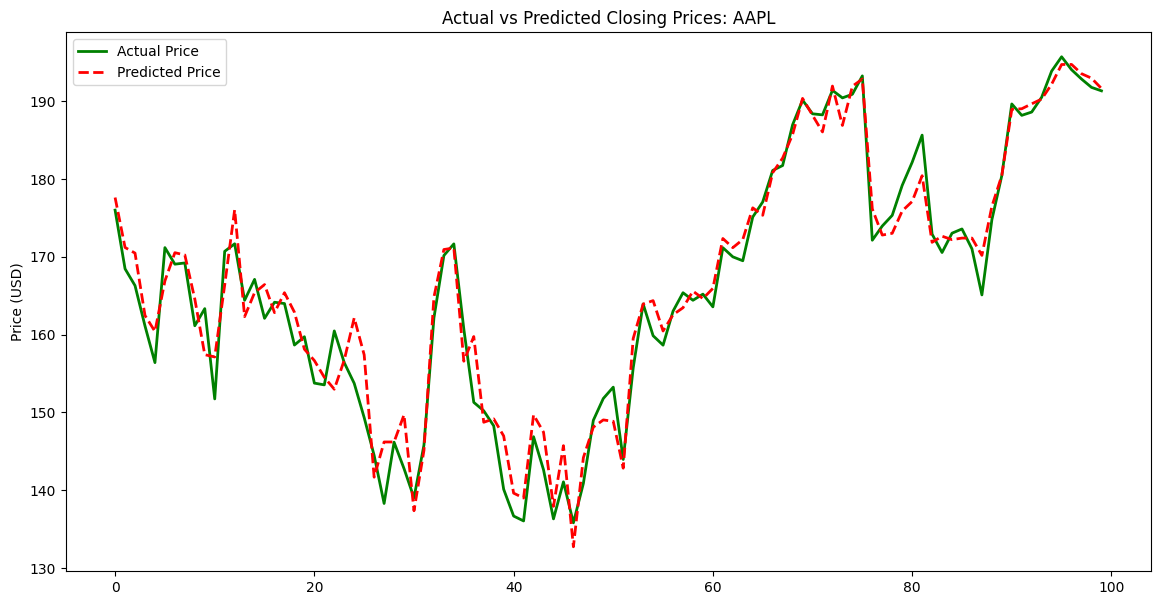

In [14]:
# Create a DataFrame to compare Actual vs Predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}, index=y_test.index)
comparison = comparison.sort_index() # Sort by date for a clean plot

plt.figure(figsize=(14, 7))
plt.plot(comparison['Actual'].values, label='Actual Price', color='green', linewidth=2)
plt.plot(comparison['Predicted'].values, label='Predicted Price', color='red', linestyle='--', linewidth=2)
plt.title(f'Actual vs Predicted Closing Prices: {ticker}')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Final Insights:

**Model Performance:** The $R^2$ score tells us how much of the price variance our model explains. A score closer to 1.0 indicates a very strong fit.Error

 **Analysis:** The Mean Absolute Error (MAE) represents the average dollar amount the prediction was off. For example, an MAE of 2.50 means the model is typically within $2.50 of the real price.  
         
**Limitation**:Stock prices are influenced by external news (earnings calls, interest rates) which aren't in this CSV. This model predicts based only on price action, which is why it's a "short-term" tool.